In [32]:
import warnings
from pandas.errors import PerformanceWarning  # Use this if PerformanceWarning needs to be suppressed
from statsmodels.tools.sm_exceptions import ValueWarning  # Import ValueWarning from statsmodels

# Suppress specific warnings
warnings.filterwarnings("ignore", category=UserWarning)   # General warnings
warnings.filterwarnings("ignore", category=FutureWarning) # FutureWarning from statsmodels
warnings.filterwarnings("ignore", category=ValueWarning)  # ValueWarning for unsupported index
warnings.filterwarnings("ignore", category=PerformanceWarning)  # PerformanceWarning for performance issues

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

!jupyter nbconvert --to html "/content/drive/My Drive/Colab Notebooks/FA4_n1_Time_Series.ipynb"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
[NbConvertApp] Converting notebook /content/drive/My Drive/Colab Notebooks/FA4_n1_Time_Series.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 5 image(s).
[NbConvertApp] Writing 612626 bytes to /content/drive/My Drive/Colab Notebooks/FA4_n1_Time_Series.html


# FA 4

Samson, Justine Aizel D.

# Chemical Process Viscosity Dataset

In [25]:
# prompt: get data or get acess to my drive /content/drive

from google.colab import drive
drive.mount('/content/drive')

# Now you can access your Google Drive files using the path '/content/drive/My Drive/'
# For example, to list the files in your Google Drive:
#!ls '/content/drive/My Drive/'

# Import required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import acf, pacf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
import warnings
from pandas.errors import PerformanceWarning  # Use this if PerformanceWarning needs to be suppressed
from statsmodels.tools.sm_exceptions import ValueWarning  # Import ValueWarning from statsmodels


# Load the dataset
data_path = "/content/drive/My Drive/CSV files/Chemical Process Viscosity.xlsx"
data = pd.read_excel(data_path)

# Display the first few rows of the dataset
data.head()



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,TimePeriod,Reading
0,1,86.7418
1,2,85.3195
2,3,84.7355
3,4,85.1113
4,5,85.1487


**1. Make a time series plot of the data.**


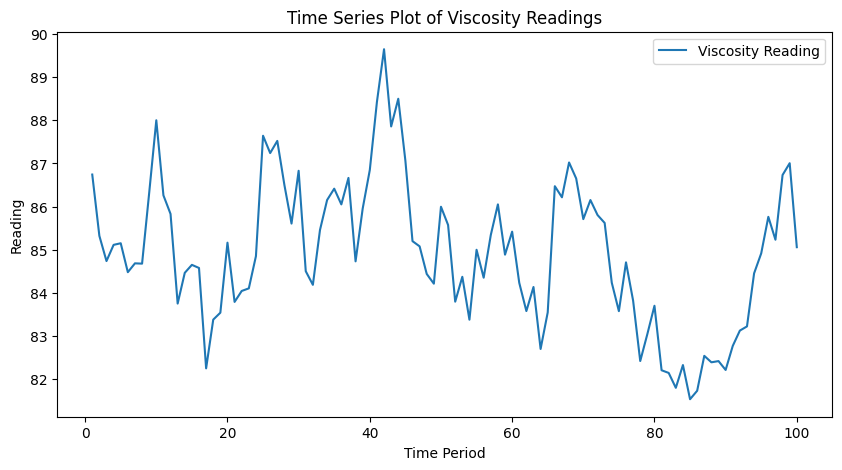

In [26]:
# Step 1: Make a time series plot of the data
# Set 'TimePeriod' as the index and use 'Reading' as the time series data
data.set_index('TimePeriod', inplace=True)
reading_ts = data['Reading']

plt.figure(figsize=(10, 5))
plt.plot(reading_ts, label='Viscosity Reading')
plt.title("Time Series Plot of Viscosity Readings")
plt.xlabel("Time Period")
plt.ylabel("Reading")
plt.legend()
plt.show()


**2. Calculate and plot the sample autocorrelation and partial autocorrelation functions.**

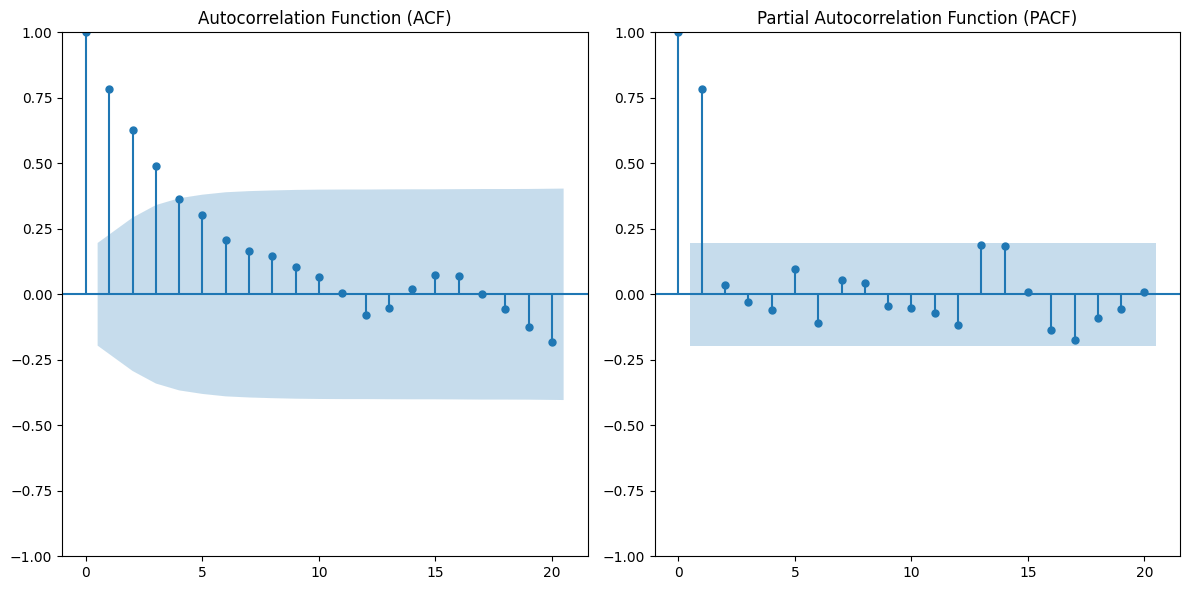

In [27]:
# Step 2: Calculate and plot the ACF and PACF
# Plot ACF and PACF
plt.figure(figsize=(12, 6))

# Autocorrelation Function (ACF)
plt.subplot(121)
plot_acf(data['Reading'], lags=20, ax=plt.gca())
plt.title('Autocorrelation Function (ACF)')

# Partial Autocorrelation Function (PACF)
plt.subplot(122)
plot_pacf(data['Reading'], lags=20, ax=plt.gca(), method='ywm')
plt.title('Partial Autocorrelation Function (PACF)')

plt.tight_layout()
plt.show()

**3. Based on 1, and 2, explain and identify which ARIMA model/s may be appropriate.**


*Time Series Plot*

---



The time series plot shows fluctuations around a constant mean, without a clear trend or seasonality. The variance appears to be stable over time.
Since there is no significant upward or downward trend, the data likely does not require differencing. This suggests that the degree of differencing (d) parameter in the ARIMA model could be set to 0.

*Autocorrelation Function (ACF) Plot*

---



The ACF shows significant autocorrelations up to lag 3, with the autocorrelation decreasing gradually afterward. This pattern suggests the presence of AR components.

The tailing off of the ACF (gradual decay) suggests that we could include moving average (MA) terms in the model, but the AR terms might dominate.

*Partial Autocorrelation Function (PACF) Plot*

---



The PACF has a significant spike at lag 1, after which it drops sharply, and then there are smaller, less significant spikes. This sharp drop suggests that the model should include at least one AR term.

**4. Fit appropriate ARIMA model to these data and check for model adequacy.**


                               SARIMAX Results                                
Dep. Variable:                Reading   No. Observations:                  100
Model:                 ARIMA(1, 0, 1)   Log Likelihood                -145.293
Date:                Wed, 13 Nov 2024   AIC                            298.586
Time:                        07:34:21   BIC                            309.007
Sample:                             0   HQIC                           302.804
                                - 100                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         84.9868      0.492    172.603      0.000      84.022      85.952
ar.L1          0.7963      0.084      9.452      0.000       0.631       0.961
ma.L1         -0.0278      0.158     -0.176      0.8

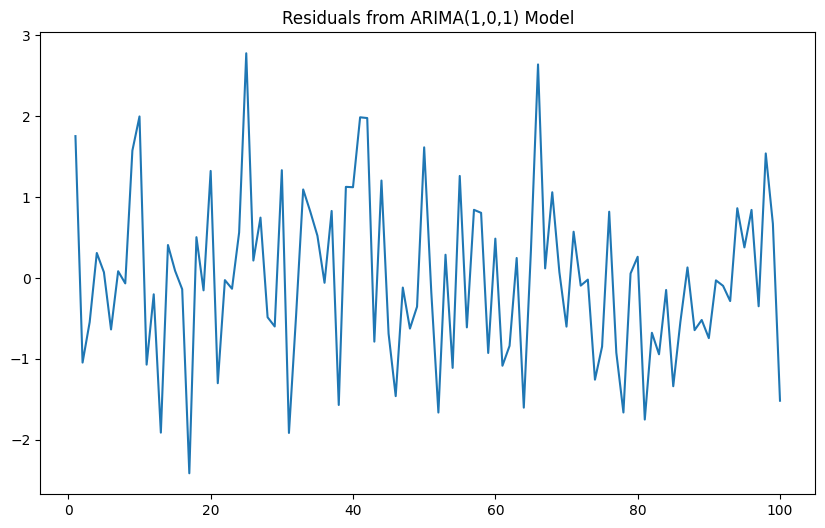

In [28]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt

# Fit an ARIMA(1,0,1) model to the data
model = ARIMA(data['Reading'], order=(1, 0, 1))
model_fit = model.fit()

# Print the model summary to check coefficients and model adequacy
print(model_fit.summary())

# Step 4: ADF test for stationarity
adf_test = adfuller(data['Reading'])
print(f"ADF Statistic: {adf_test[0]}")
print(f"p-value: {adf_test[1]}")

# Check residuals for adequacy
residuals = model_fit.resid
plt.figure(figsize=(10, 6))
plt.plot(residuals)
plt.title("Residuals from ARIMA(1,0,1) Model")
plt.show()


# **ARIMA Model Summary:**

**ARIMA(1,0,1) Model:** This means the model includes one autoregressive term (AR(1)) and one moving average term (MA(1)) with no differencing (D=0).
Constant (const): The coefficient is approximately 84.99, which suggests the mean level around which the data fluctuates. This is typical for the series' level.




**AR(1) Coefficient (ar.L1):** The AR(1) coefficient is 0.7963, highly significant with a p-value < 0.0001, implying a strong autoregressive component. This suggests that past values have a meaningful impact on the current value in the series.




**MA(1) Coefficient (ma.L1):** The moving average coefficient is -0.0278, with a high p-value (0.860), indicating that the MA component is not statistically significant. It may not be necessary in this model.
Sigma²: The estimated variance of residuals is 1.06, indicating the level of noise or volatility in the series.

---


**Model Adequacy Tests:**

---

**Ljung-Box Test:** This test checks whether the residuals are white noise (i.

e., uncorrelated). The Q-statistic is close to 0 (p-value = 0.95), indicating that the residuals are not autocorrelated, which is a good sign for model adequacy.


**Jarque-Bera Test:** This test checks for normality in residuals. With a JB statistic of 1.02 (p-value = 0.60), there is no strong evidence to reject the null hypothesis of normality, meaning the residuals appear to be normally distributed.

**Heteroskedasticity Test:** A value of 0.58 for the H-statistic suggests mild heteroskedasticity, though the p-value (0.12) implies it's not statistically significant.

---
**ADF Test (Augmented Dickey-Fuller Test):**

---


**ADF Statistic:** The ADF test statistic is -3.4789, which is below the critical value for stationarity at the 5% significance level.

**p-value:** 0.0085. Since this value is less than 0.05, we reject the null hypothesis that the data contains a unit root. Therefore, the series appears to be stationary.

**Residual Plot Analysis:**

Looking at the residuals plot, we can see that they fluctuate around zero, which is a good sign that the model is capturing the main patterns in the data. However, there are occasional spikes, which may suggest some outliers or brief periods of increased volatility. Overall, the residuals don't show any obvious patterns of autocorrelation, which aligns with the results of the Ljung-Box test.

**5. Make one-step-ahead forecasts of the last 10 observations and determine the forecast errors.**

Forecast Errors: 100   -2.317728
101   -1.941611
102   -1.828772
103   -0.585379
104   -0.111771
105    0.742678
106    0.218387
107    1.724491
108    2.002156
109    0.057792
Name: predicted_mean, dtype: float64


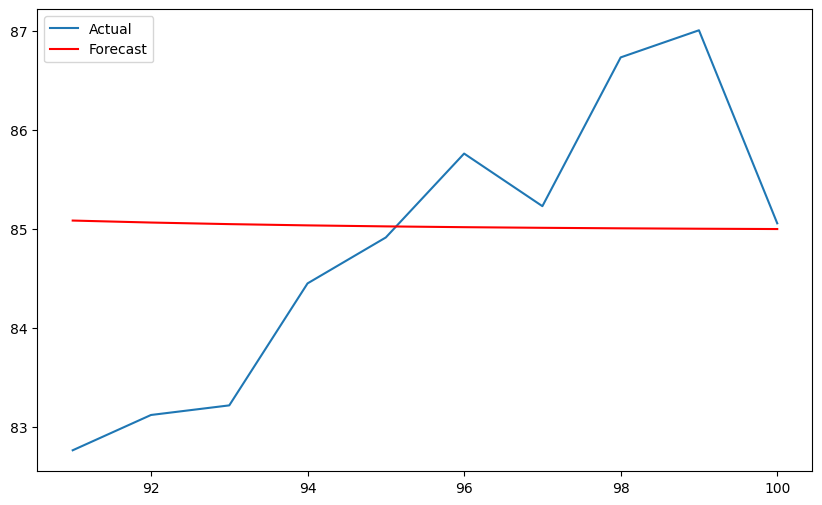

In [29]:
# Step 5: Make one-step-ahead forecasts for the last 10 observations
n_forecast = 10
forecast_obj = model_fit.get_forecast(steps=n_forecast)
forecast_mean = forecast_obj.predicted_mean
forecast_conf_int = forecast_obj.conf_int()

# Actual values for the last 10 observations
actual_values = data['Reading'][-n_forecast:].values

# Calculate forecast errors (actual - forecast)
forecast_errors = actual_values - forecast_mean
print("Forecast Errors:", forecast_errors)


plt.figure(figsize=(10, 6))
plt.plot(data.index[-n_forecast:], actual_values, label='Actual')
plt.plot(data.index[-n_forecast:], forecast_mean, label='Forecast', color='red')
#plt.fill_between(data.index[-n_forecast:],
                 #forecast_conf_int[:, 0], forecast_conf_int[:, 1], color='pink', alpha=0.3)
#plt.title("One-step-ahead Forecast vs Actual")
plt.legend()
plt.show()



**Plot Analysis:**

**Actual vs Forecast:** The plot compares the actual values (blue line) against the forecasted values (red line) for the last 10 observations in the dataset.

**Actual values:** The actual series shows an upward trend over the last 10 periods, reaching a peak and then dropping near the end.

**Forecast values:** The ARIMA model's forecast remains fairly flat, indicating that the model predicted little to no change over these periods.

This is often typical for an ARIMA model when it has difficulty capturing recent trends or volatility.

**Observation:**
The actual data exhibits more variability and an upward trend, whereas the ARIMA(1,0,1) model forecast is more conservative and fails to follow this short-term pattern. This discrepancy is common when the model’s parameters (in this case AR(1) and MA(1)) are not able to capture sharp short-term movements or trends.


# Trying other order

                                     SARIMAX Results                                      
Dep. Variable:                            Reading   No. Observations:                  100
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -142.529
Date:                            Wed, 13 Nov 2024   AIC                            295.059
Time:                                    07:34:27   BIC                            307.388
Sample:                                         0   HQIC                           300.024
                                            - 100                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7950      0.112      7.109      0.000       0.576       1.014
ma.L1         -0.9984      2.286   

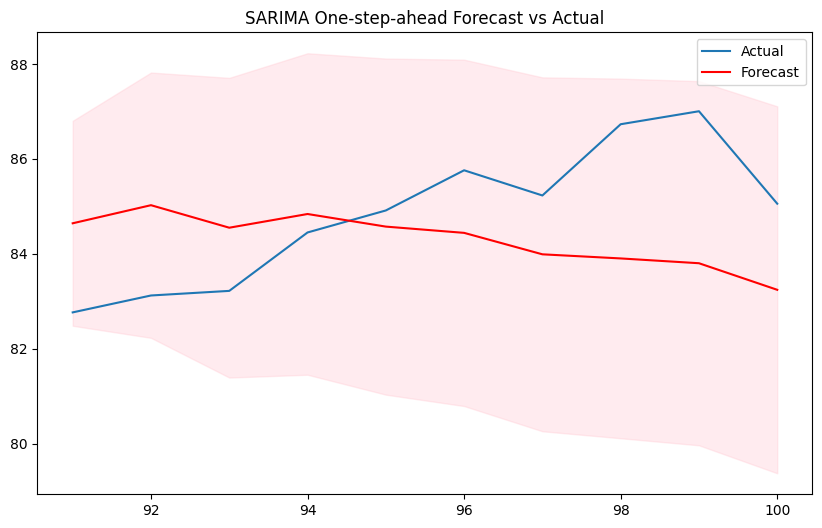

In [30]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pyplot as plt

# Define the SARIMA model (p, d, q) for ARIMA and (P, D, Q, S) for seasonality.
sarima_model = SARIMAX(data['Reading'],
                       order=(1, 1, 1),
                       seasonal_order=(1, 1, 1, 12))

# Fit the model
sarima_fit = sarima_model.fit()

# Print the summary of the SARIMA model to check the performance
print(sarima_fit.summary())

# Make one-step-ahead forecasts (e.g., last 10 observations)
n_forecast = 10
forecast_obj = sarima_fit.get_forecast(steps=n_forecast)
forecast_mean = forecast_obj.predicted_mean
forecast_conf_int = forecast_obj.conf_int()

# Check the shape of forecast_conf_int to ensure it's 2D
print(forecast_conf_int.shape)  # Should be (10, 2) or (n_forecast, 2)

# Get the actual values (last n_forecast observations)
actual_values = data['Reading'][-n_forecast:]

# Plot forecast vs actual
plt.figure(figsize=(10, 6))

# Plot actual values (last n_forecast)
plt.plot(actual_values.index, actual_values, label='Actual')

# Plot forecasted values
plt.plot(actual_values.index, forecast_mean, label='Forecast', color='red')

# If forecast_conf_int is a DataFrame, use .iloc for slicing:
# Plot the confidence intervals (assuming forecast_conf_int is 2D)
if isinstance(forecast_conf_int, pd.DataFrame):
    plt.fill_between(actual_values.index,
                     forecast_conf_int.iloc[:, 0],  # Lower bound
                     forecast_conf_int.iloc[:, 1],  # Upper bound
                     color='pink', alpha=0.3)
else:
    plt.fill_between(actual_values.index,
                     forecast_conf_int[:, 0],  # Lower bound
                     forecast_conf_int[:, 1],  # Upper bound
                     color='pink', alpha=0.3)

plt.title("SARIMA One-step-ahead Forecast vs Actual")
plt.legend()
plt.show()


# Analysis of the SARIMA Forecast Results:

The SARIMA model was applied with the configuration (1, 1, 1) for ARIMA terms and (1, 1, 1, 12) for the seasonal component, which is indicative of yearly seasonality (i.e., 12 periods per year). The results can be broken down into two parts: the statistical model summary and the visual forecast vs. actual plot.


**SARIMA Model Summary:**

**AR(1) Coefficient (ar.L1):** The autoregressive coefficient (AR) is 0.795, indicating a relatively strong positive correlation with the previous time step.

**MA(1) Coefficient (ma.L1):** The moving average (MA) coefficient is -0.998, but it has a very high standard error, leading to an insignificant z-value (p = 0.662). This means the moving average component might not be contributing significantly to the model.

**Seasonal AR(12) and MA(12) Terms:** The seasonal autoregressive (ar.S.L12) and moving average (ma.S.L12) coefficients are both close to -1, but their p-values (0.175 and 0.993) indicate that they are statistically insignificant. This suggests that the seasonal component is not playing a major role in explaining the variability of the data.

**Sigma (sigma2):** The variance of the residuals is quite large, which could point to a high level of noise in the data that is not captured well by the model.

**Model Fit (AIC/BIC):** The Akaike Information Criterion (AIC) is 295.059 and the Bayesian Information Criterion (BIC) is 307.388. These values are used to compare different models, and lower values indicate a better fit. Given these results, there might be room for improving the model fit by trying other configurations.

**Ljung-Box Test (Q):** The p-value of 0.97 indicates that the residuals are not significantly different from white noise. This suggests that the model is capturing the autocorrelations in the data adequately.

**Jarque-Bera Test (JB):** The p-value of 0.72 shows that the residuals are not significantly skewed or kurtotic, indicating they are normally distributed.

# Plot Analysis (SARIMA One-step-ahead Forecast vs Actual):

**Actual vs Forecast:**

The actual data (blue line) shows a clear upward trend over the forecast period (last 10 data points).
The forecasted values (red line) follow the general trend but tend to underestimate the magnitude, especially towards the end of the forecast period.

**Confidence Intervals:**

The pink shaded area represents the 95% confidence interval for the forecasts. The actual values lie within this confidence band, which means the model's predictions are reasonable even though it underestimates the actual values.

However, the confidence intervals are quite wide, suggesting that the model has a high degree of uncertainty in its predictions. This might be due to the large residual variance (sigma2), as reflected in the model summary.
